# Goodreads analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt

### Inspect the data quickly

In [2]:
df = pd.read_csv('books.csv',error_bad_lines = False) #error bad lines will skip all the bad lines

display(df.head(5))
display(df.tail(5))
display(df.sample(5))

b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
11118,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9781560254416,eng,512,156,20,12/21/2004,Da Capo Press
11119,45633,You Bright and Risen Angels,William T. Vollmann,4.08,0140110879,9780140110876,eng,635,783,56,12/1/1988,Penguin Books
11120,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,0140131965,9780140131963,eng,415,820,95,8/1/1993,Penguin Books
11121,45639,Poor People,William T. Vollmann,3.72,0060878827,9780060878825,eng,434,769,139,2/27/2007,Ecco
11122,45641,Las aventuras de Tom Sawyer,Mark Twain,3.91,8497646983,9788497646987,spa,272,113,12,5/28/2006,Edimat Libros


,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
8841,34187,The Brooklyn Bridge (Wonders of the World),Elizabeth Mann/Alan Witschonke,4.44,1931414165,9781931414166,eng,46,37,6,9/12/2006,Mikaya Press
6567,24769,Blue Noon (Midnighters #3),Scott Westerfeld,3.85,0060519592,9780060519599,eng,384,14798,718,2/6/2007,Eos
9799,39311,Brand New Justice: How Branding Places and Pro...,Simon Anholt,3.69,0750666005,9780750666008,en-US,184,15,0,1/15/2005,Routledge
9281,36489,Justice Oliver Wendell Holmes: Law and the Inn...,G. Edward White,3.67,0195101286,9780195101287,eng,648,17,2,12/19/1995,Oxford University Press USA
8598,33026,The Dream and the Underworld,James Hillman,4.22,0060906820,9780060906825,en-US,256,746,34,7/25/1979,William Morrow Paperbacks


In [3]:
df.info()

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
bookID                11123 non-null int64
title                 11123 non-null object
authors               11123 non-null object
average_rating        11123 non-null float64
isbn                  11123 non-null object
isbn13                11123 non-null int64
language_code         11123 non-null object
  num_pages           11123 non-null int64
ratings_count         11123 non-null int64
text_reviews_count    11123 non-null int64
publication_date      11123 non-null object
publisher             11123 non-null object
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11123.000000,11123.000000,1.112300e+04,11123.000000,1.112300e+04,11123.000000
mean,21310.856963,3.934075,9.759880e+12,336.405556,1.794285e+04,542.048099
std,13094.727252,0.350485,4.429758e+11,241.152626,1.124992e+05,2576.619589
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10277.500000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780582e+12,299.000000,7.450000e+02,47.000000
75%,32104.500000,4.140000,9.780872e+12,416.000000,5.000500e+03,238.000000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


### Clean the data up

     I don't need publisher and isbn so let's remove that

In [4]:
drop = ['isbn','publisher','isbn13']

df = df.drop(drop,axis = 1)

### Clean the data up:

    I'd be better if I just kept the original author in the authors column. It seems they are keeping the translators as well so let's drop that. I'll do that by splitting the str by the delimter of '/' and removing all the excess.

In [5]:
display(df.head())

split = [item.split('/') for item in df['authors']]
split = [item[0] for item in split]

df['authors'] = split
display(df.head(5))

,bookID,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,652,2095690,27591,9/16/2006
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,eng,870,2153167,29221,9/1/2004
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,eng,352,6333,244,11/1/2003
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,eng,435,2339585,36325,5/1/2004
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,eng,2690,41428,164,9/13/2004


,bookID,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling,4.57,eng,652,2095690,27591,9/16/2006
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling,4.49,eng,870,2153167,29221,9/1/2004
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,eng,352,6333,244,11/1/2003
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling,4.56,eng,435,2339585,36325,5/1/2004
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling,4.78,eng,2690,41428,164,9/13/2004


### Basic Plotting:

    Let's start with some basic plotting. Looking at the top rated books, authors, and the most reviewed books. Let's also look at the language breakdown in goodreads. We can also take a look at whether there are a few relationships present within books.
    
    1) Is there a relationship between the num of pages in a book and the average_rating it has
    2) Do older books (typically classics) tend to review better than new ones
    3) Is there a relationship between the number of ratings a book gets (popularity) vs the rating it gets.
    4) What are the top 10 most rated authors and what's their average rating.
    5) Most popular books on goodreads, what about their rating?

,authors,ratings_count,average_rating
0,J.K. Rowling,9005888,4.521250
1,J.R.R. Tolkien,5601792,4.223137
2,Stephenie Meyer,4597666,3.590000
3,Dan Brown,4140267,3.820588
4,William Shakespeare,4049289,3.930682
5,Stephen King,3919914,4.003537
6,Nicholas Sparks,3084994,3.998333
7,J.D. Salinger,2778019,3.970000
8,Rick Riordan,2413447,4.266000
9,George Orwell,2327145,4.150000


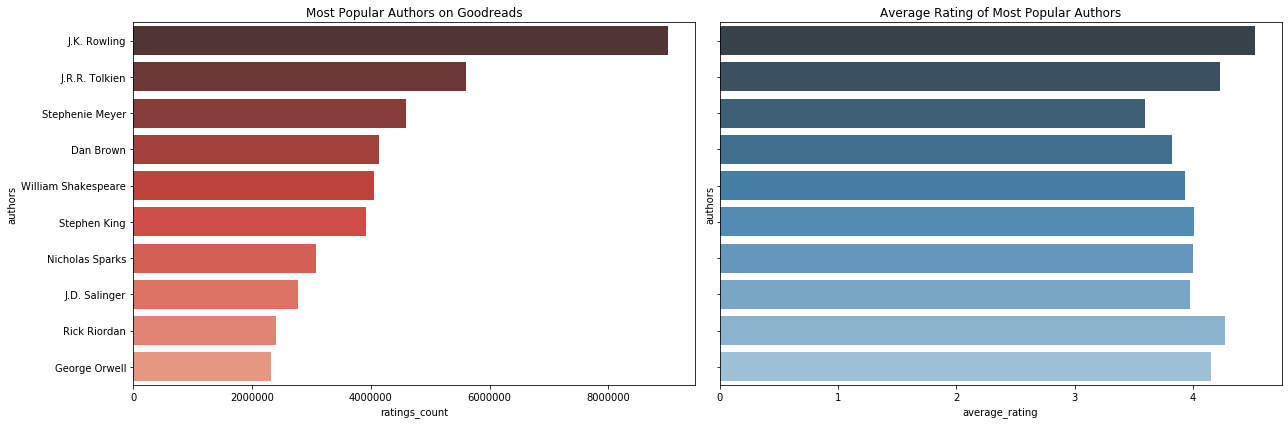

In [6]:
popular =df.groupby('authors')['ratings_count'].sum().reset_index().sort_values('ratings_count',ascending = False)
avg = df.groupby('authors')['average_rating'].mean().reset_index().sort_values('average_rating',ascending = False)

avg_pop = pd.merge(popular,avg, on ='authors')
display(avg_pop.head(10))

fig,(ax1,ax2) = plt.subplots(nrows = 1, ncols =2,figsize=(18,6),sharey = True)

sns.barplot(data = avg_pop.head(10), x ='ratings_count', y='authors',ax = ax1,palette ='Reds_d')
sns.barplot(data = avg_pop.head(10), x ='average_rating', y='authors',ax = ax2,palette = 'Blues_d')

ax1.set_title('Most Popular Authors on Goodreads')
ax2.set_title('Average Rating of Most Popular Authors')
    
plt.tight_layout()
plt.show()

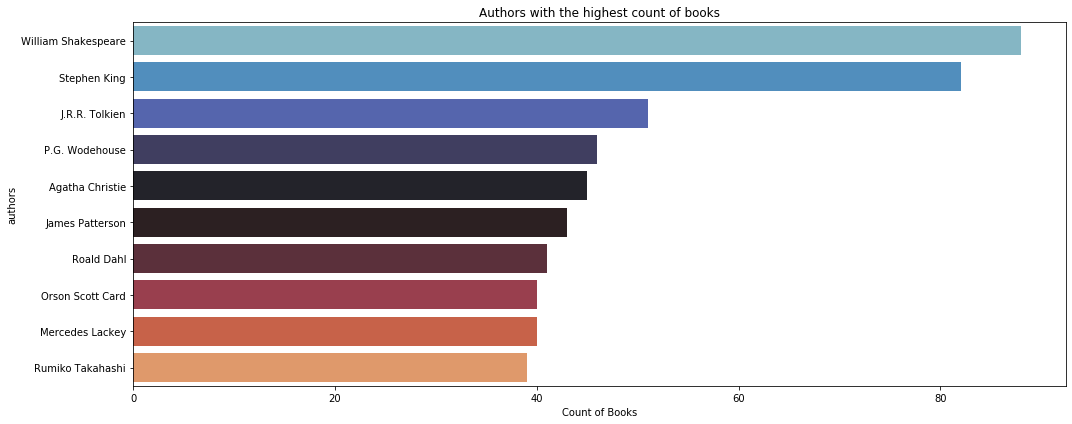

In [7]:
books_amt = df.groupby('authors')['title'].count().sort_values(ascending = False).head(10).reset_index()


fig, ax = plt.subplots(figsize = (15,6))

sns.barplot(data = books_amt,y ='authors',x ='title',ax = ax,palette = 'icefire')
ax.set_title('Authors with the highest count of books')
ax.set_xlabel('Count of Books')

plt.tight_layout()
plt.show()

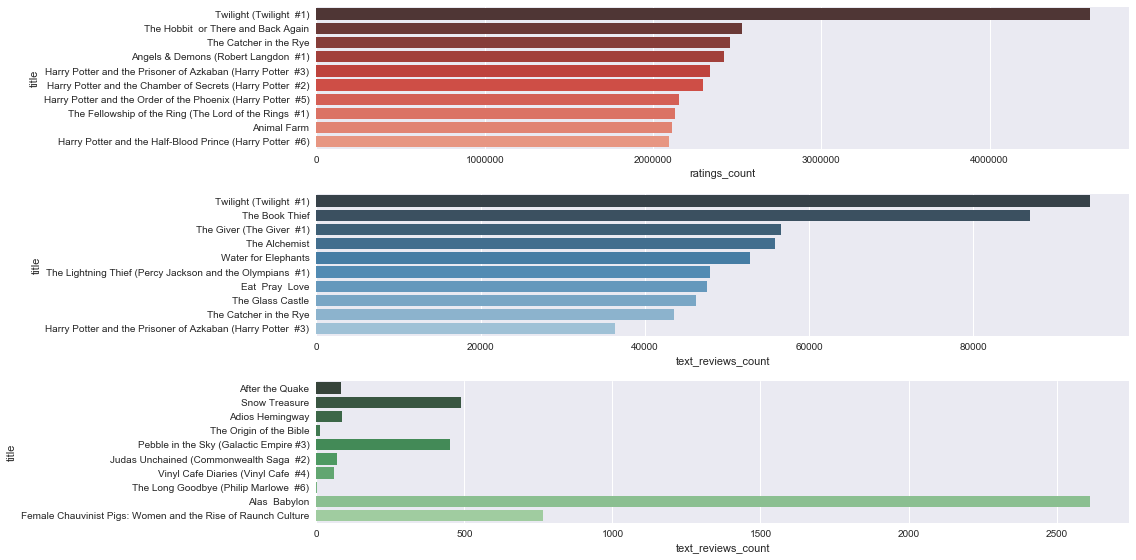

In [232]:
ratings_count = df.sort_values('ratings_count',ascending= False).head(10)
reviews_count = df.sort_values('text_reviews_count',ascending = False).head(10)

fig,(ax1,ax2,ax3) = plt.subplots(ncols = 1, nrows =3,figsize =(16,8))

sns.barplot(data = ratings_count, y ='title',x ='ratings_count',ax=ax1,palette ='Reds_d')
sns.barplot(data = reviews_count, y= 'title',x ='text_reviews_count',ax=ax2,palette = 'Blues_d')
sns.barplot(data = df.sample(10), y ='title', x ='text_reviews_count', ax=ax3, palette = 'Greens_d')

plt.tight_layout()h
plt.show()

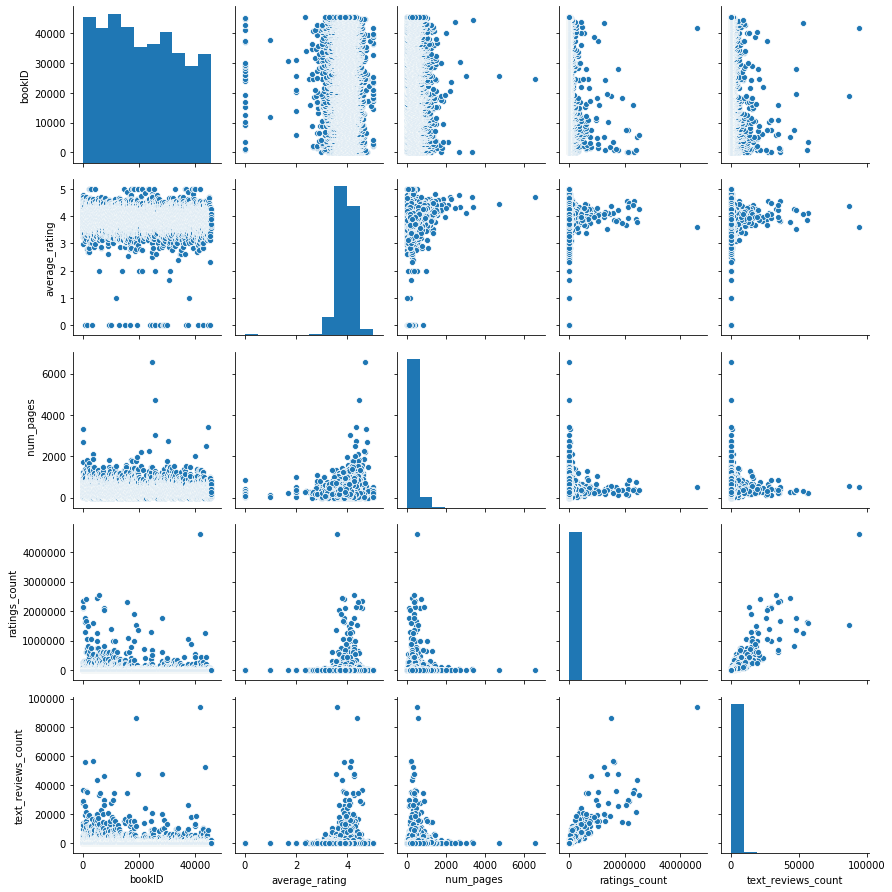

In [9]:
sns.pairplot(data = df)

plt.tight_layout()
plt.show()

### Relationships

    Let's see if the following relationships exist:
    1) Is there a relationship between the num of pages in a book and the average_rating it has
    2) Do older books (typically classics) tend to review better than new ones
    3) Is there a relationship between the number of ratings a book gets (popularity) vs the rating it gets.

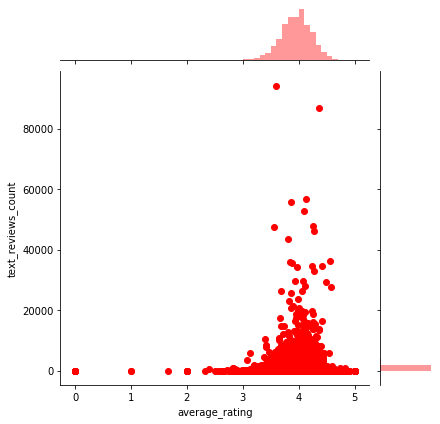

<Figure size 1080x576 with 0 Axes>

In [10]:
sns.jointplot(x="average_rating",y='text_reviews_count', 
                  kind='scatter',  data= df,color = 'Red')

plt.figure(figsize= (15,8))
plt.show()

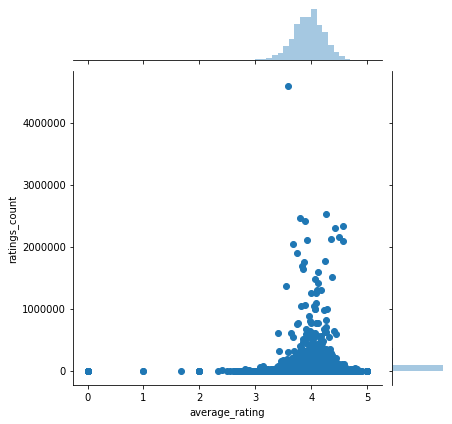

In [47]:
sns.jointplot(x="average_rating",y='ratings_count', 
                  kind='scatter',  data= df)

plt.show()

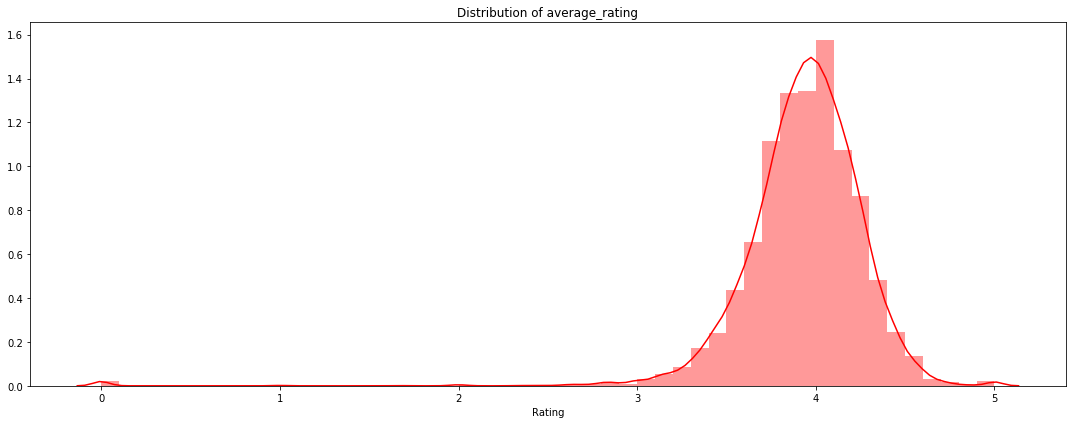

In [138]:
fig, ax = plt.subplots(figsize = (15,6))

sns.distplot(df['average_rating'],color = 'Red')
ax.set_xlabel('Rating')
ax.set_title('Distribution of average_rating')

plt.tight_layout()
plt.show()

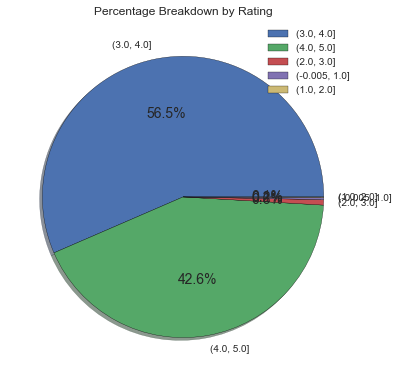

In [230]:
df['range'] = pd.cut(df['average_rating'],bins = 5)

plt.style.use('seaborn-notebook')
ratings_pie = df['range'].value_counts().reset_index()

fig,ax = plt.subplots()

ax.pie(ratings_pie['range'],labels = ratings_pie['index'],shadow = True,wedgeprops = {'edgecolor':'black'},
      autopct = '%1.1f%%')

ax.set_title('Percentage Breakdown by Rating')
plt.legend()
plt.tight_layout()
plt.show()

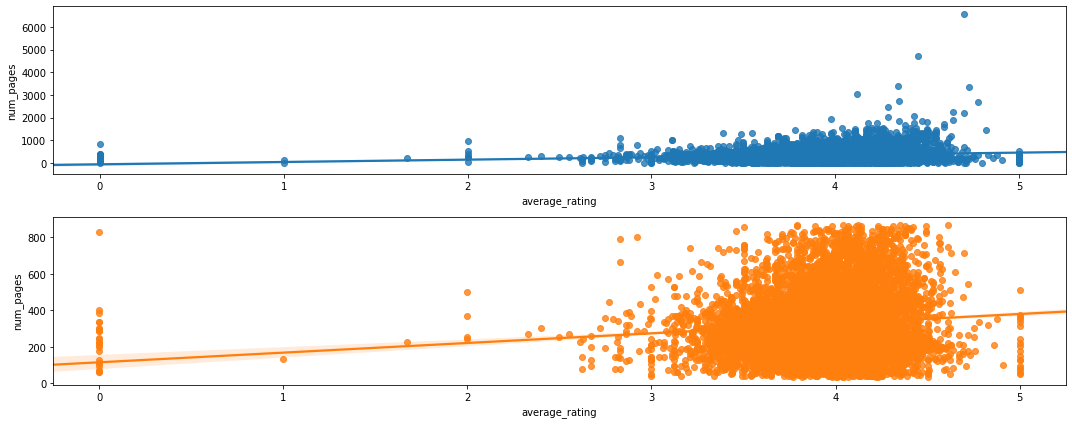

,bookID,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,year
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling,4.57,eng,652,2095690,27591,9/16/2006,2006
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,eng,352,6333,244,11/1/2003,2003
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling,4.56,eng,435,2339585,36325,5/1/2004,2004
5,9,"Unauthorized Harry Potter Book Seven News: ""Ha...",W. Frederick Zimmerman,3.74,en-US,152,19,1,4/26/2005,2005
7,12,The Ultimate Hitchhiker's Guide: Five Complete...,Douglas Adams,4.38,eng,815,3628,254,11/1/2005,2005
...,...,...,...,...,...,...,...,...,...,...
11118,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann,4.06,eng,512,156,20,12/21/2004,2004
11119,45633,You Bright and Risen Angels,William T. Vollmann,4.08,eng,635,783,56,12/1/1988,1988
11120,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,eng,415,820,95,8/1/1993,1993
11121,45639,Poor People,William T. Vollmann,3.72,eng,434,769,139,2/27/2007,2007


In [131]:
df = df.rename(columns = {'  num_pages':'num_pages'})

fig,(ax1,ax2) = plt.subplots(figsize=(15,6),ncols=1,nrows=2)

sns.regplot(data = df, x ='average_rating', y= 'num_pages',ax =ax1)

q_hi  = df["num_pages"].quantile(0.97)
q_low = df['num_pages'].quantile(0.03)    

df_filtered = df[(df["num_pages"] < q_hi) & (df["num_pages"] > q_low)]

sns.regplot(data = df_filtered, x ='average_rating', y= 'num_pages',ax =ax2)

plt.tight_layout()
plt.show()

df_filtered

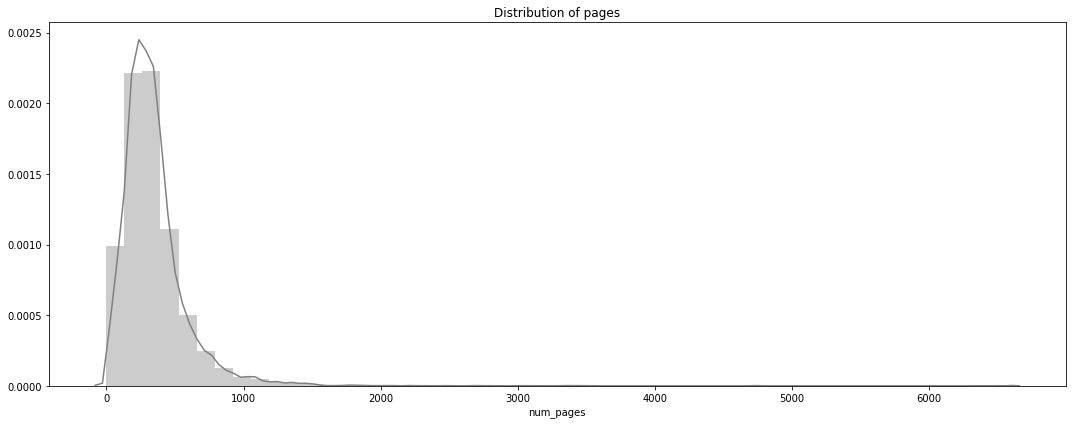

In [14]:
fig, ax = plt.subplots(figsize = (15,6))


sns.distplot(df['num_pages'],color ='Grey')
ax.set_title('Distribution of pages')


plt.tight_layout()
plt.show()

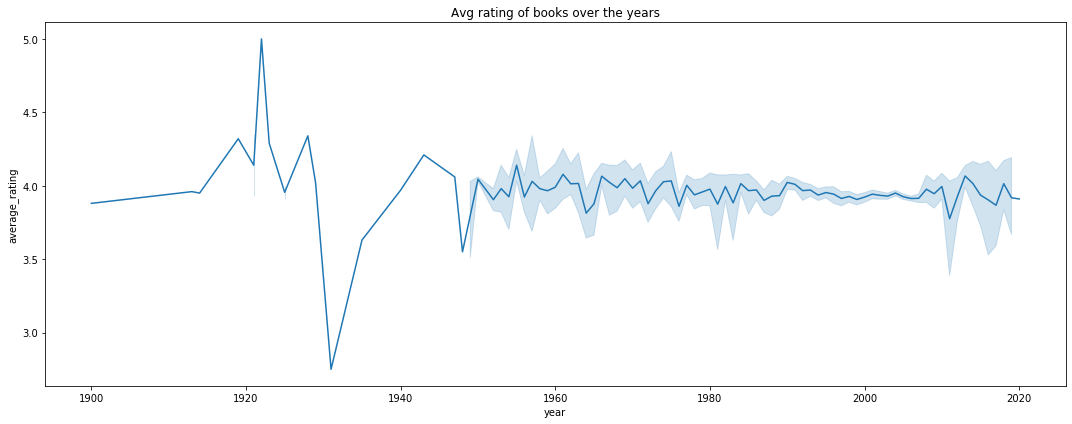

In [17]:
df['year'] = [item[-4:] for item in df['publication_date']]

year_rating = df.groupby(['year','title'])['average_rating'].mean().reset_index()
year_rating['year'] = pd.to_datetime(year_rating['year'])

fig,ax = plt.subplots(figsize= (15,6))
sns.lineplot(data = year_rating, x ='year',y = 'average_rating',ax =ax)

ax.set_title('Avg rating of books over the years')

plt.tight_layout()
plt.show()

In [229]:
#Let's remove bottom/top outliers in ratings_count and then groupby languages

language = df[df['ratings_count'] >2000]

display(language.groupby(['language_code'])['average_rating'].mean())
display(df['language_code'].value_counts())

#This isn't worth looking into, checked out some of my foreign authors that I like and the languages are not
#correct.There should be portuguese and other important languages.

language_code
en-CA    4.001667
en-GB    4.003947
en-US    3.925620
eng      3.973739
enm      4.180000
fre      3.906667
ger      3.875000
ita      4.020000
mul      4.250000
rus      4.210000
spa      3.941818
swe      3.910000
Name: average_rating, dtype: float64

eng      8908
en-US    1408
spa       218
en-GB     214
fre       144
ger        99
jpn        46
mul        19
zho        14
grc        11
por        10
en-CA       7
ita         5
enm         3
lat         3
rus         2
swe         2
wel         1
msa         1
gla         1
glg         1
nor         1
ale         1
ara         1
tur         1
srp         1
nl          1
Name: language_code, dtype: int64